This Jupyter notebook is one of many that fully document the data analysis completed for the publication "DNA Barcoding, Collection Management, and the Bird Collection in the Smithsonian’s National Museum of Natural History" by Schindel et al.

You can view all analysis notebooks, data, and figures in the GitHub repository here: https://github.com/MikeTrizna/USNMBirdDNABarcoding2017

# Creating Figure 2 -- Bivariate plot of maximum divergence between members of a species versus minimum divergence between species for the most similar members of each species

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
org_summary = pd.read_csv('data/processed/schindel2017_distance_summary.tsv',
                          sep = "\t")
orgs_to_plot = org_summary.dropna()
print(orgs_to_plot.head())

            scientific_name  count  max_intra  min_inter
2         Accipiter bicolor      2   0.001553   0.077520
7   Accipiter superciliosus      4   0.000000   0.082300
8         Accipiter tachiro      2   0.000000   0.001534
10       Acrocephalus aedon      3   0.003945   0.110900
11      Actenoides lindsayi      3   0.001536   0.110600


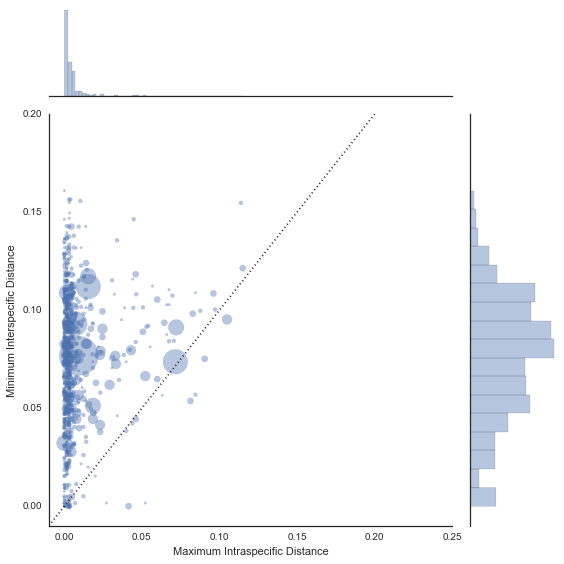

In [3]:
sns.set(style="white", color_codes=True)

g = sns.jointplot(x='max_intra', y="min_inter", data=orgs_to_plot, stat_func=None,
                  
                 ylim=(-0.01,0.2), xlim=(-0.01,0.25),
                 s = 2.5 ** orgs_to_plot['count'],
                 alpha = 0.4,
                 size=8, ratio=4)
g.set_axis_labels("Maximum Intraspecific Distance", "Minimum Interspecific Distance")

x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')    

In [4]:
g.savefig('figures/bivariate_distance_plot.png', bbox_inches='tight')

In [5]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [6]:
from bokeh.models import HoverTool
from bokeh.plotting import figure, show, ColumnDataSource

In [7]:
scale = 0.001
source = ColumnDataSource(
        data={'x':orgs_to_plot['max_intra'],
              'y':orgs_to_plot['min_inter'],
              'org_names':orgs_to_plot['scientific_name']})
hover = HoverTool(
        tooltips=[("scientific name", "@org_names")]
    )

In [8]:
p = figure(tools=[hover, 'crosshair,pan,wheel_zoom,box_zoom,reset,save,lasso_select'])
p.scatter('x', 'y', source=source, fill_alpha=0.4)
p.line([0,0.2], [0,0.2], line_width=2)
show(p)